In [160]:
import pandas as pd
# import ydata_profiling  as ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve



from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('Datasets\diabetes.csv')
# profile = ProfileReport.ProfileReport(df, title="Profiling Report")
# profile.to_file("output.html")


In [163]:
target = 'Outcome'
X = df.drop(columns=target)
y = df[target]

In [164]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


In [166]:
## use after train_test_split to avoid data leakage
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) ## fit là đo, transform là may
x_test = scaler.transform(x_test) ## only use transform, not fit_transform

### choose model

In [167]:
params = {
    "penalty": ['l1', 'l2'],
    "C": [0.1, 0.5, 1, 5, 10],
    "solver": ['liblinear'],
    "max_iter": [100, 200, 300],
    "class_weight": ['balanced', None],
    "random_state": [100]
}
model = GridSearchCV(LogisticRegression(random_state=100),param_grid=params, scoring = 'recall', cv=6, verbose=2, n_jobs= -1)
model.fit(x_train, y_train)

Fitting 6 folds for each of 60 candidates, totalling 360 fits


GridSearchCV(cv=6, estimator=LogisticRegression(random_state=100), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'random_state': [100], 'solver': ['liblinear']},
             scoring='recall', verbose=2)

In [168]:
print(model.best_params_, model.best_score_)

{'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'random_state': 100, 'solver': 'liblinear'} 0.7464285714285714


In [190]:
# Assuming `model` is your trained LogisticRegression model and `X_test` is your test data
probabilities = model.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
new_threshold = 0.4  # Example of a lower threshold
y_pred = (probabilities >= new_threshold).astype(int)

In [191]:
print(confusion_matrix(y_test, y_pred))

[[54 45]
 [ 7 48]]


In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68        99
           1       0.52      0.87      0.65        55

    accuracy                           0.66       154
   macro avg       0.70      0.71      0.66       154
weighted avg       0.75      0.66      0.67       154



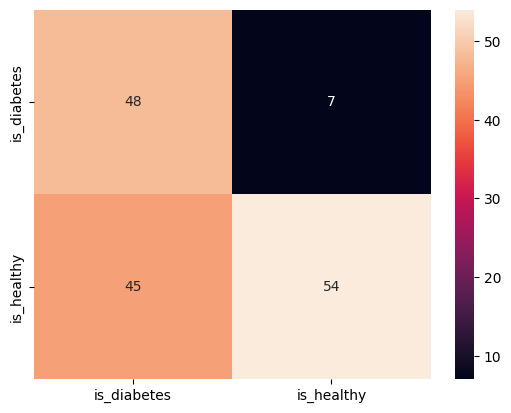

In [198]:

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_diabetes','is_healthy'], columns=['is_diabetes','is_healthy'])
confusion
sns.heatmap(confusion, annot=True)
plt.show()